# <a id="inicio"></a> Relatório de Regressão Linear

-----

### **Título:** Análise financeira do Google
### **Autor:** Glauco Lauria Marques Filho

-----

## <a id="resumo"></a> Resumo 

#### Este relatório descreve uma análise de regressão linear realizada para prever o Preço de fechamento das ações do Google com base em indicadores financeiros. O estudo inclui a coleta e análise de dados, a criação do modelo de regressão, bem como a avaliação de sua precisão.

## <a id="sumario"></a> Sumário


* [Início](#inicio)
* [Resumo](#resumo)
* [Sumário](#sumario)
* [Introdução (O que)](#introducao)
* [Motivação (Por que)](#motivacao)
* [Metodologia (Como)](#metodologia)

1. [Coleta de Dados](#1_coleta_dados)
2. [Análise Exploratória de Dados (EDA)](#2_eda)
   - 2.1. [Valores Ausentes](#2_1_valores_ausentes)
   - 2.2. [Outliers](#2_2_outliers)


 

## <a id="introducao"></a> Introdução (O que)

#### A análise de regressão linear é uma técnica estatística que visa entender as relações entre uma variável dependente e uma ou mais variáveis independentes. Neste estudo, o objetivo é prever o Preço de fechamento das ações do Google com base em indicadores financeiros diversos como EBITDA, Cash Flow e outros.

## <a id="motivacao"></a> Motivação (Por que)

A análise de regressão linear é realizada para compreender as relações entre a variável dependente, Adj. Close, e as variáveis independentes:

EBITDA                                 
Total Debt                             
Free Cash Flow                         
Gross Profit Margin                    
Operating Margin                       
Net Profit Margin                      
Return on Equity                       
Return on Assets                       
Free Cash Flow to Net Income           
Current Ratio                          
Liabilities to Equity Ratio            
Debt Ratio                             
Earnings Per Share, Basic              
Sales Per Share                        
Equity Per Share            

Isso permite prever com precisão a Adj. Close e, assim, ajudar pessoas interessadas em ações a prever o preço de fechamento das ações baseados no indicadores atuais do Google.



## <a id="metodologia"></a> Metodologia (Como)

In [47]:
# Importando as bibliotecas necessárias
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### <a id="1_coleta_dados"></a> 1. Coleta de Dados

##### Os dados foram coletados pelo professor Elton, eles são referentes a indicadores de desempenho financeiro da empresa Google, sendo 4 relatórios por ano, de 2014 até 2023, esse último apenas com 3 relatórios.

In [48]:
df = pd.read_parquet("fund_goog.parquet")
df.reset_index(inplace=True)
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by="Date", ascending=True)
df.head()

,Date,Adj. Close,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,Net Profit Margin,Return on Equity,Return on Assets,Free Cash Flow to Net Income,Current Ratio,Liabilities to Equity Ratio,Debt Ratio,"Earnings Per Share, Basic",Sales Per Share,Equity Per Share
0,2014-03-27,27.92,1.818400e+10,5.245000e+09,1.372100e+10,0.60387,0.27744,0.22934,0.14584,0.11479,1.07759,4.58172,0.27043,0.04729,0.95637,4.17002,6.55776
1,2014-04-24,26.26,1.878300e+10,6.243000e+09,1.432200e+10,0.60650,0.27195,0.22141,0.13999,0.11018,1.11551,4.62901,0.27058,0.05358,0.96012,4.33645,6.85832
2,2014-07-25,29.45,1.964200e+10,5.241000e+09,1.460300e+10,0.60982,0.27226,0.21306,0.13537,0.10659,1.12660,4.55665,0.27007,0.04310,0.96566,4.53222,7.13320
3,2014-10-23,27.20,1.979600e+10,5.239000e+09,1.543500e+10,0.60659,0.25982,0.20016,0.12884,0.10122,1.21239,4.47070,0.27289,0.04165,0.94497,4.72116,7.33466
4,2015-01-29,25.53,2.001900e+10,5.237000e+09,1.329000e+10,0.61075,0.24994,0.21541,0.13689,0.11005,0.93480,4.68776,0.24386,0.04054,1.05165,4.88220,7.68269


#### Os dados são compostos por:

- Adj. Close: Preço de fechamento das ações do Google;
- EBITDA: Lucro operacional antes de juros, impostos, depreciação e amortização;
- Total Debt: Dívida total;
- Free Cash Flow: Fluxo de caixa livre;
- Gross Profit Margin: Margem de lucro bruto, indicando a rentabilidade;
- Operating Margin: Margem operacional, representando a lucratividade das operações;
- Net Profit Margin: Margem de lucro líquido, indicando a rentabilidade após despesas;
- Return on Equity: Taxa de retorno sobre o patrimônio líquido;
- Return on Assets: Taxa de retorno sobre os ativos;
- Free Cash Flow to Net Income: Relação entre fluxo de caixa livre e lucro líquido;
- Current Ratio: Índice de liquidez corrente;
- Liabilities to Equity Ratio: Proporção das obrigações em relação ao patrimônio;
- Debt Ratio: Proporção da dívida em relação aos ativos;
- Earnings Per Share, Basic: Lucro disponível por ação;
- Sales Per Share: Receita por ação;
- Equity Per Share: Patrimônio líquido por ação.

## <a id="2_eda"></a> 2. Análise Exploratória de Dados (EDA)

#### Foram realizadas análises estatísticas descritivas e visualizações para entender a distribuição das variáveis, identificar valores ausentes e outliers.

### <a id="2_1_valores_ausentes"></a> 2.1 Valores Ausentes

##### Não foi encontrado nenhum valor ausente nessa base de dados.

In [49]:
missing_values = df.isnull().sum()
missing_values

Date                            0
Adj. Close                      0
EBITDA                          0
Total Debt                      0
Free Cash Flow                  0
Gross Profit Margin             0
Operating Margin                0
Net Profit Margin               0
Return on Equity                0
Return on Assets                0
Free Cash Flow to Net Income    0
Current Ratio                   0
Liabilities to Equity Ratio     0
Debt Ratio                      0
Earnings Per Share, Basic       0
Sales Per Share                 0
Equity Per Share                0
dtype: int64

### <a id="2_2_outliers"></a> 2.2 Outliers

##### Fazendo uma Análise de Outliers utilizando o método de Intervalo Interquartil (IQR) padrão de 1,5.

In [50]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

Date                             0
Adj. Close                       0
EBITDA                           0
Total Debt                       0
Free Cash Flow                   0
Gross Profit Margin              0
Operating Margin                 7
Net Profit Margin               10
Return on Equity                 0
Return on Assets                 3
Free Cash Flow to Net Income     7
Current Ratio                    0
Liabilities to Equity Ratio      0
Debt Ratio                       0
Earnings Per Share, Basic        0
Sales Per Share                  0
Equity Per Share                 0
dtype: int64

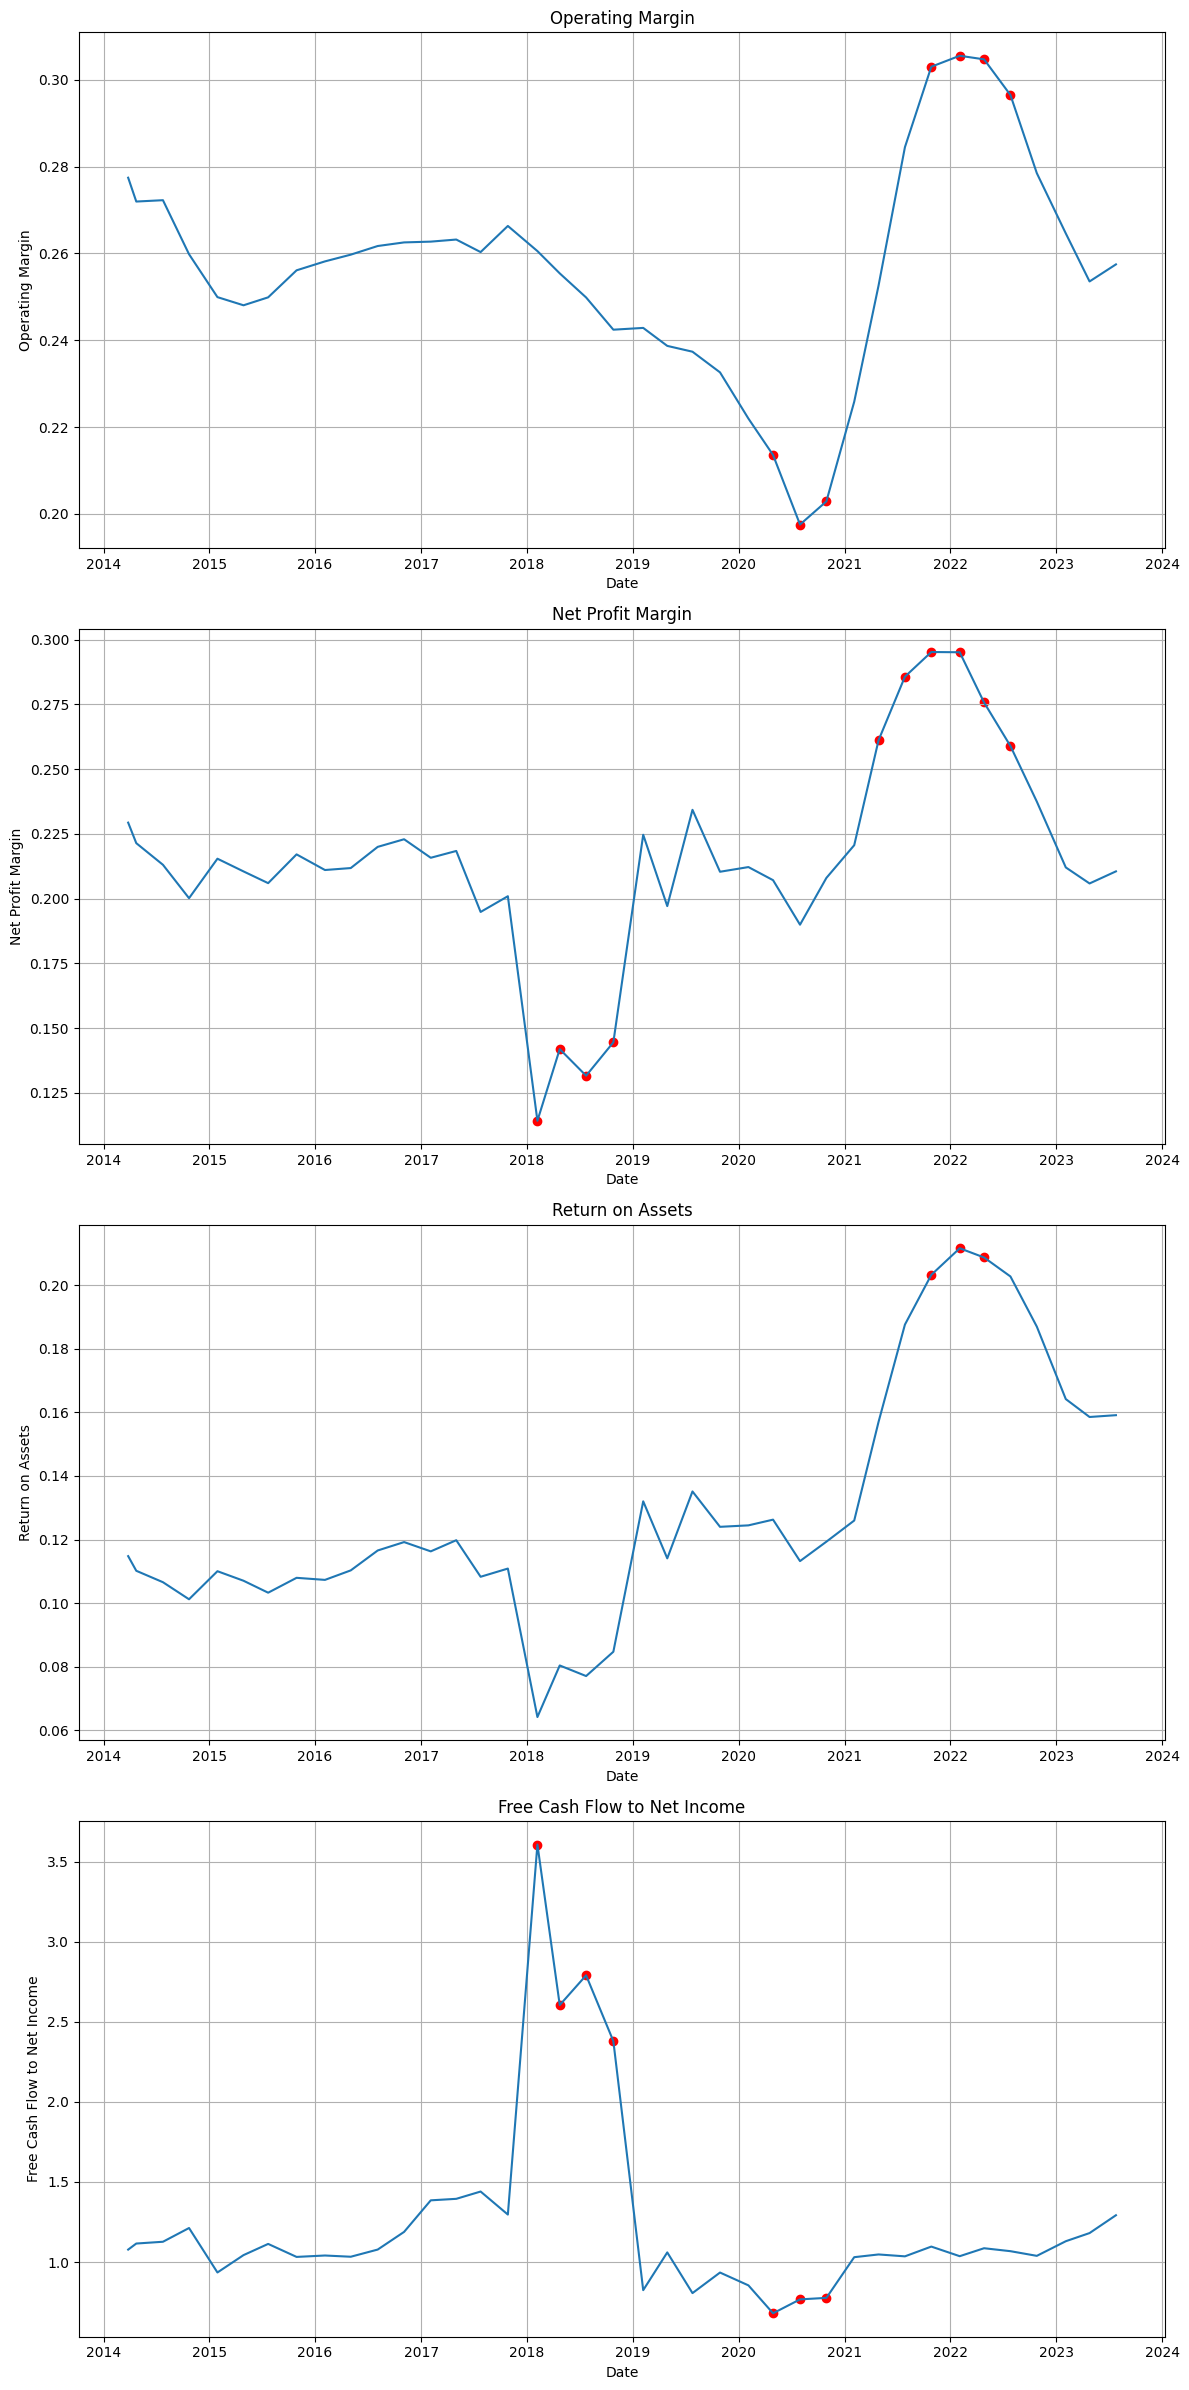

In [51]:
variaveis_com_outliers = [
    "Operating Margin",
    "Net Profit Margin",
    "Return on Assets",
    "Free Cash Flow to Net Income",
]

fig, axs = plt.subplots(
    len(variaveis_com_outliers), 1, figsize=(12, 6 * len(variaveis_com_outliers))
)

for ax, variavel in zip(axs, variaveis_com_outliers):
    sns.lineplot(data=df, x="Date", y=variavel, ax=ax)

    Q1 = df[variavel].quantile(0.25)
    Q3 = df[variavel].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[variavel] < (Q1 - 1.5 * IQR)) | (df[variavel] > (Q3 + 1.5 * IQR))

    ax.scatter(df[outliers]["Date"], df[outliers][variavel], color="red")

    ax.set_title(f"{variavel}")
    ax.set_xlabel("Date")
    ax.set_ylabel(variavel)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [52]:
estatisticas = pd.DataFrame(
    columns=["Variável", "Mínimo", "Máximo", "Média", "Desvio Padrão"]
)
for variavel in variaveis_com_outliers:
    minimo = df[outliers][variavel].min()
    maximo = df[outliers][variavel].max()
    media = df[outliers][variavel].mean()
    desvio_padrao = df[outliers][variavel].std()
    estatisticas = pd.concat(
        [
            estatisticas,
            pd.DataFrame(
                {
                    "Variável": [variavel],
                    "Mínimo": [minimo],
                    "Máximo": [maximo],
                    "Média": [media],
                    "Desvio Padrão": [desvio_padrao],
                }
            ),
        ],
        ignore_index=True,
    )

estatisticas

C:\Users\glauc\AppData\Local\Temp\ipykernel_13532\729367014.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  estatisticas = pd.concat(


,Variável,Mínimo,Máximo,Média,Desvio Padrão
0,Operating Margin,0.19757,0.26054,0.231759,0.026335
1,Net Profit Margin,0.11422,0.20799,0.162470,0.038395
2,Return on Assets,0.06418,0.12627,0.095030,0.024127
3,Free Cash Flow to Net Income,0.67991,3.60741,1.943601,1.187271


##### Foram encontrados 4 variáveis com supostos Outliers, 'Operating Margin', 'Net Profit Margin', 'Return on Assets', 'Free Cash Flow to Net Income'. Porém vamos analisar caso a caso a definição de cada um deles e seu contexto para verificar se de fato podem ser considerados como Outliers.


<br>

- ##### Operating Margin, representando a lucratividade das operações.
##### Seus valores variaram de 19,567% até 26,054%, com uma média de 23,1769%. Ao comparar com outras empresas do mesmo segmento vemos que essa variável não indica um outlier, apresentando sim um valor coerente para a natureza do negócio. Segundo o link a seguir, a Microsoft variou de 61% até 17%. [Companies Market Cap](https://companiesmarketcap.com/microsoft/operating-margin/#:~:text=Operating%20Margin%20as%20of%20November,an%20Operating%20Margin%20of%2042.06%25.). Logo Operating Margin foi desconsiderado da presença de Outliers.


<br>

- ##### Net Profit Margin, representando a rentabilidade após despesas.
##### Seus valores variaram de 11,422% até 20,799%, com uma média de 16,2470%. Ao comparar com outras empresas do mesmo segmento vemos que essa variável não indica um outlier, apresentando sim um valor coerente para a natureza do negócio. Segundo o link a seguir, a Microsoft variou de 12% até 38%. [Macro Trends](https://www.macrotrends.net/stocks/charts/MSFT/microsoft/net-profit-margin). Logo Net Profit Margin foi desconsiderado da presença de Outliers.


<br>

- ##### Return on Assets, representando a Taxa de retorno sobre os ativos.
##### Seus valores variaram de 6,418% até 12,627%, com uma média de 9,5030%. Ao comparar com outras empresas do mesmo segmento vemos que essa variável não indica um outlier, apresentando sim um valor coerente para a natureza do negócio. Segundo o link a seguir, a Microsoft variou de 5% até 25%. [Macro Trends](https://www.macrotrends.net/stocks/charts/MSFT/microsoft/roa). Logo Return on Assets foi desconsiderado da presença de Outliers.


<br>

- ##### Free Cash Flow to Net Income, que representa a relação entre fluxo de caixa livre e lucro líquido.
##### Seus valores variaram de 67,991% até 360,741%, com uma média de 194,3601%. Ao comparar com outras empresas do mesmo segmento vemos que essa variável não indica um outlier, apresentando sim um valor coerente para a natureza do negócio. Segundo o link a seguir, a Microsoft variou de 80% até 200%. [Finbox](https://finbox.com/NASDAQGS:MSFT/explorer/fcf_to_ni/). Logo Free Cash Flow to Net Income foi desconsiderado da presença de Outliers.

